## Dependencias

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()

Matplotlib is building the font cache; this may take a moment.


## Lectura de datos

In [2]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Regresión_Lineal/day.csv'

In [3]:
df = pd.read_csv(ruta)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Derfinición de variables

In [6]:
um = ['instant']
vart = ['cnt']
varc = [v for v in df.columns if v not in vart and v not in um and df[v].dtype!='object']

## Análisis exploratorio

### Valores nulos

In [7]:
nulos = 1-df.describe().T[['count']]/len(df)
nulos

,count
instant,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0
atemp,0.0


### Valores extremos

In [8]:
X = df[varc].copy()

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

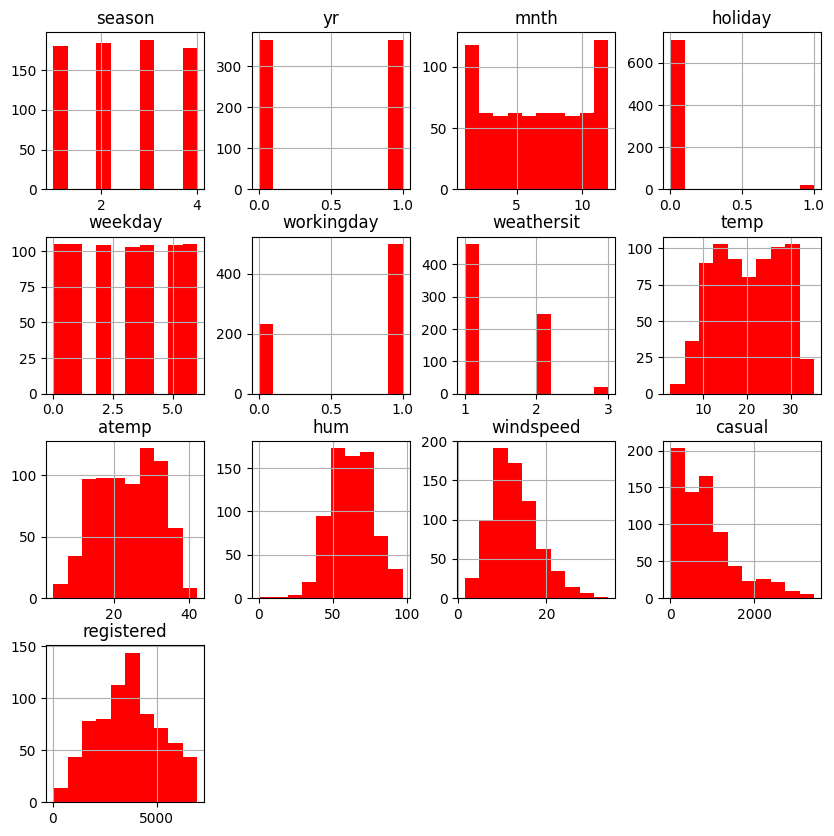

In [9]:
X[varc].hist(figsize=(10,10),color='red')

In [10]:
for v,li,ls in X.describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X[f'ex_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
X['ex_'] = X.filter(like='ex_').max(axis=1)
X['ex_'].value_counts(1)

ex_
0    0.89726
1    0.10274
Name: proportion, dtype: float64

In [11]:
X[um+vart] = df[um+vart]

In [12]:
X = X.loc[X['ex_']==0].drop(X.filter(like='ex_').columns,axis=1).reset_index(drop=True)

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

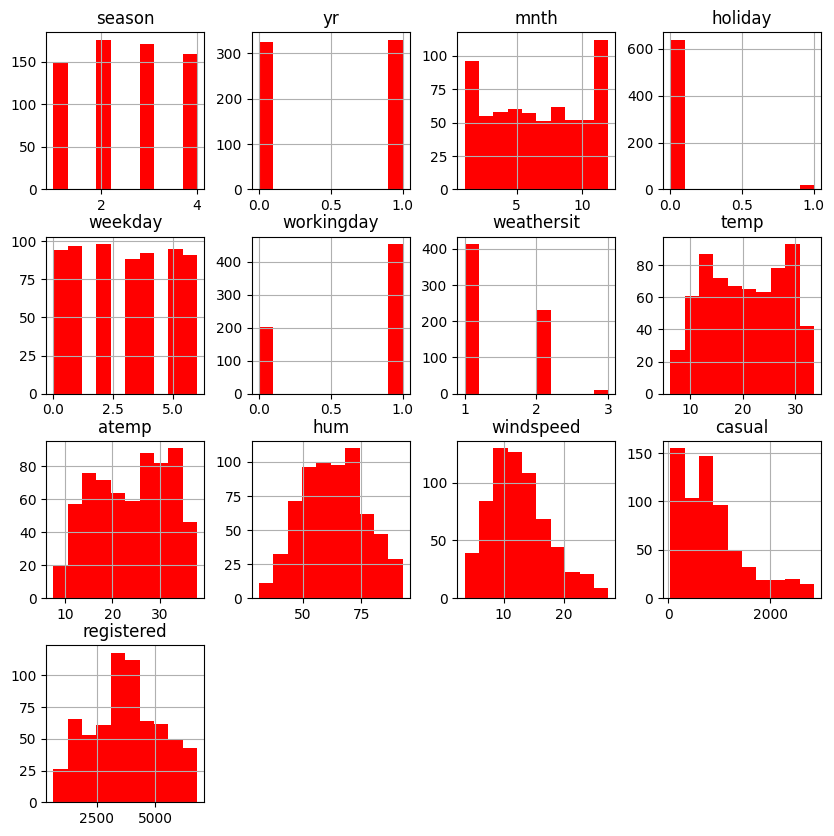

In [13]:
X[varc].hist(figsize=(10,10),color='red')

/home/oscarjarillo/Documentos/Entornos(python)/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



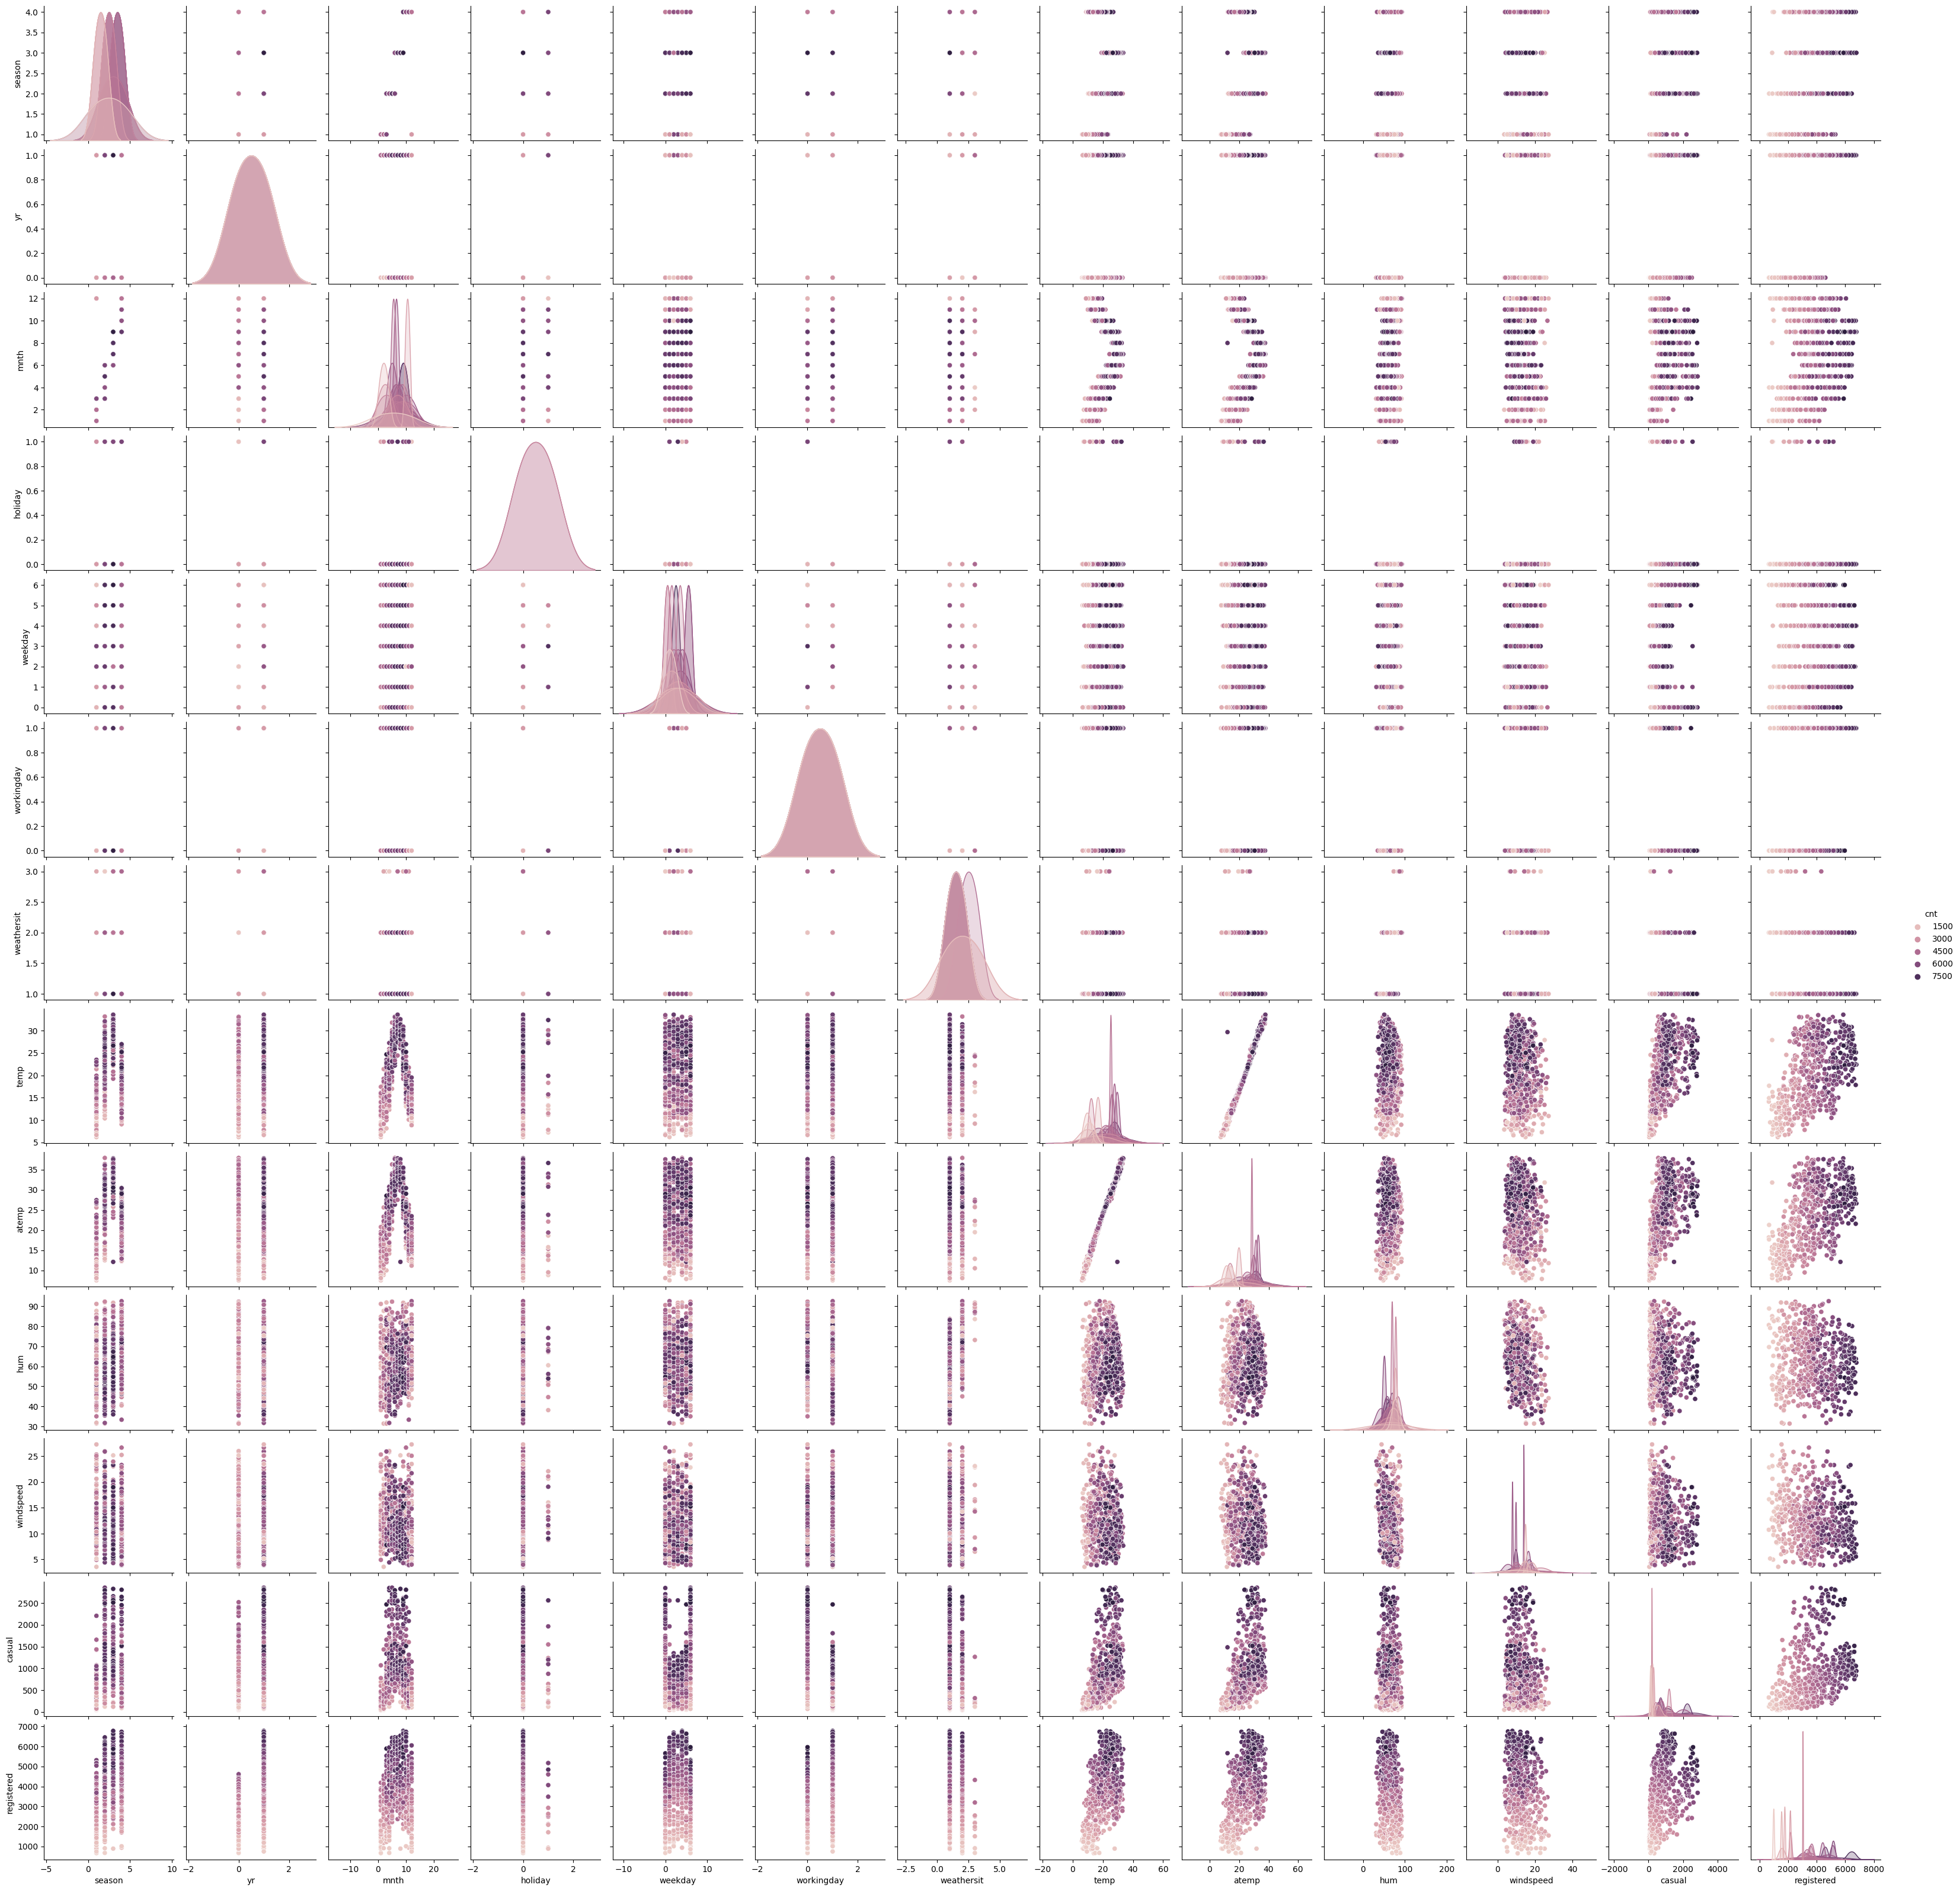

In [14]:
sns.pairplot(data=X[varc+vart],hue=vart[0])

## Partición

In [15]:
Xt,Xv,yt,yv = train_test_split(X[um+varc],X[um+vart],train_size=0.7)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

## Aprendizaje

In [16]:
modelo = LinearRegression(n_jobs=-1)
modelo.fit(Xt[varc],yt[vart[0]])

LinearRegression(n_jobs=-1)

In [17]:
modelo.coef_,modelo.intercept_

(array([-4.17543601e-13, -2.40607534e-12,  6.02521505e-14,  9.22741535e-13,
        -7.13098387e-14,  4.55180242e-13,  3.84389244e-13,  1.86591194e-14,
        -2.95171873e-14,  1.46323925e-15,  1.20632671e-14,  1.00000000e+00,
         1.00000000e+00]),
 3.637978807091713e-12)

## Validación del modelo

In [18]:
St = Xt.merge(yt,on=um,how='inner')
Sv = Xv.merge(yv,on=um,how='inner')

In [19]:
St['y^'] = modelo.predict(Xt[varc])
Sv['y^'] = modelo.predict(Xv[varc])

In [20]:
print(mean_absolute_error(y_pred= St['y^'],y_true=St[vart[0]]))
print(mean_absolute_error(y_pred= Sv['y^'],y_true=Sv[vart[0]]))

1.9493072852136477e-12
1.9794205755591014e-12


<Axes: ylabel='Density'>

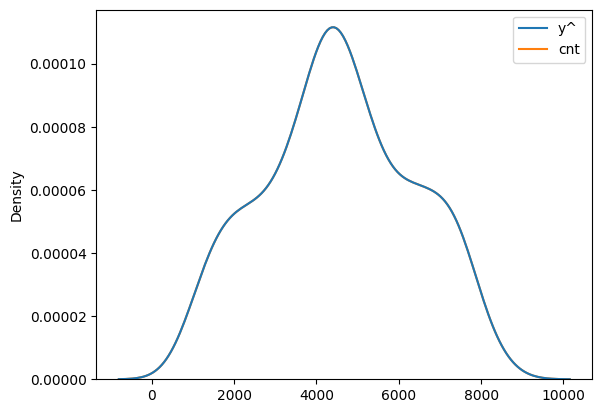

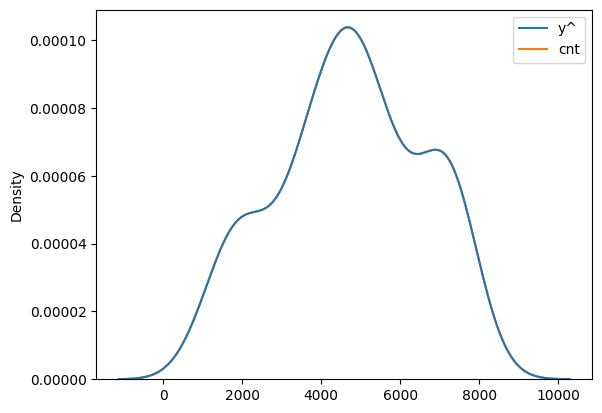

In [21]:
plt.figure()
sns.kdeplot(data=St[['y^']+vart])
plt.figure()
sns.kdeplot(data=Sv[['y^']+vart])